# Cálculo del PERT de un proyecto

## Datos de partida del PERT

In [1]:
import pandas as pd
from decimal import Decimal, getcontext
import qgrid

getcontext().prec = 10  # Precision interna de trabajo
numero_de_decimales = 0
precision = Decimal(10) ** - numero_de_decimales  # Redondeo de valores de entrada


In [75]:
datos_enunciado = pd.DataFrame([
# actividad, nodo_inicial, nodo_final, duracion_planificada, recursos, CUR, duracion_real, coste_real, coste_planificado, realizado
  ('A',          1,            2,           5,                   7,      4,       8,            10,          9,            100 ),
  ('B',          1,            3,           5,                   7,      4,       8,            10,          9,            100 ),
  ('C',          2,            5,           5,                   7,      4,       8,            10,          9,            100 ),
  ('D',          4,            7,           5,                   7,      4,       8,            10,          9,            100 ),
  ('E',          3,            6,           5,                   7,      4,       8,            10,          9,            100 ),
  ('F',          7,            8,           5,                   7,      4,       8,            10,          9,            100 ),
  ('G',          7,           12,           5,                   7,      4,       8,            10,          9,            100 ),
  ('H',          8,            9,           5,                   7,      4,       8,            10,          9,            100 ),
  ('I',          6,           10,           5,                   7,      4,       8,            10,          9,            100 ),
  ('J',          5,            9,           5,                   7,      4,       8,            10,          9,            100 ),
  ('K',         10,           11,           5,                   7,      4,       8,            10,          9,            100 ),
  ('L',         10,           11,           5,                   7,      4,       8,            10,          9,            100 ),
  ('M',          9,           12,           5,                   7,      4,       8,            10,          9,            100 ),
  ('N',         11,           12,           5,                   7,      4,       8,            10,          9,            100 ),
  ('f1',         3,            4,           5,                   7,      4,       8,            10,          9,            100 ),
  ('f2',         2,            4,           5,                   7,      4,       8,            10,          9,            100 ),
  ('f3',         6,            7,           5,                   7,      4,       8,            10,          9,            100 ), 
  ('f4',         5,            8,           5,                   7,      4,       8,            10,          9,            100 ),]
    ,columns=['actividad', 'nodo_inicial','nodo_final','duracion_planificada', 'recursos',
              'cur', 'duracion_real', 'coste_real', 'coste_planificado', 'realizado'])

datos_enunciado

,actividad,nodo_inicial,nodo_final,duracion_planificada,recursos,cur,duracion_real,coste_real,coste_planificado,realizado
0,A,1,2,5,7,4,8,10,9,100
1,B,1,3,5,7,4,8,10,9,100
2,C,2,5,5,7,4,8,10,9,100
3,D,4,7,5,7,4,8,10,9,100
4,E,3,6,5,7,4,8,10,9,100
5,F,7,8,5,7,4,8,10,9,100
6,G,7,12,5,7,4,8,10,9,100
7,H,8,9,5,7,4,8,10,9,100
8,I,6,10,5,7,4,8,10,9,100
9,J,5,9,5,7,4,8,10,9,100


In [76]:
qgrid_widget = qgrid.show_grid(datos_enunciado, show_toolbar=True)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [77]:
datos_enunciado = qgrid_widget.get_changed_df()
datos_enunciado.set_index('actividad', inplace=True)

## Cálculo usando Python
### Importamos librerías de Python.
En pmule (project management at ULE) está el código que utilizamos para calcular los valores del PERT.

In [78]:
#from IPython.display import Image
import importlib
import pmule
importlib.reload(pmule)
from pmule import GrafoProyecto, ValorGanado


La clase PertGraph permite visualizar el grafo PERT, el diagrama de Gantt así como realizar el cálculo de tiempos tempranos, tardíos y de las holguras totales.

In [79]:
proyecto = GrafoProyecto(datos_enunciado.loc[:, ['nodo_inicial', 'nodo_final']])

### Grafo PERT con numeración de nodos

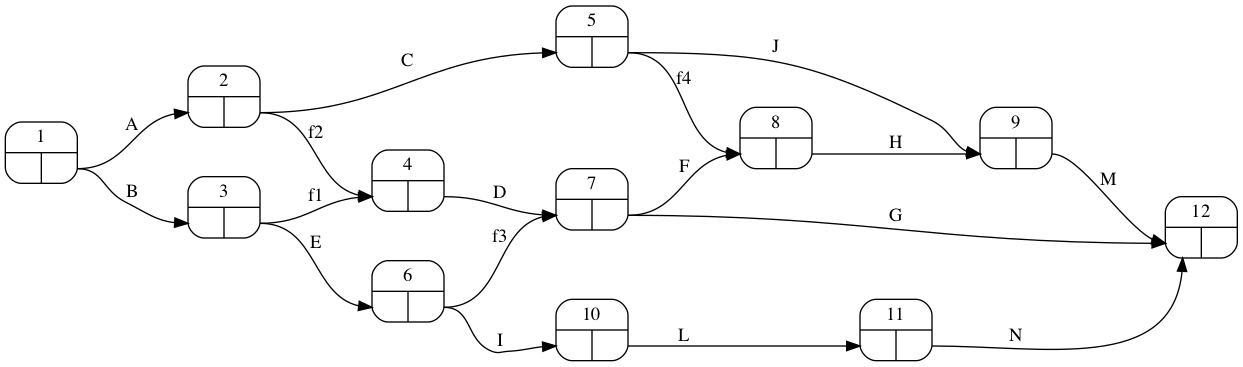

In [80]:
proyecto.pert(filename='pert_en_blanco.png', duraciones=None, orientation='portrait', tiempos=False, ranksep=1, nodesep=0.5)

### Matriz de Zaderenko 

In [85]:
zaderenko = proyecto.zaderenko(datos_enunciado['duracion_planificada'])
zaderenko

,1,2,3,4,5,6,7,8,9,10,11,12,temprano
1,,5,5,,,,,,,,,,0
2,,,,5,5,,,,,,,,5
3,,,,5,,5,,,,,,,5
4,,,,,,,5,,,,,,10
5,,,,,,,,5,5,,,,10
6,,,,,,,5,,,5,,,10
7,,,,,,,,5,,,,5,15
8,,,,,,,,,5,,,,20
9,,,,,,,,,,,,5,25
10,,,,,,,,,,,5,,15


In [86]:
resultados_pert = proyecto.calcula_pert(duraciones=datos_enunciado['duracion_planificada'])
resultados_pert['tiempos']

,tempranos,tardios
1,0,0
3,5,5
6,10,10
10,15,20
11,20,25
2,5,5
4,10,10
7,15,15
5,10,15
8,20,20


In [87]:
resultados_pert['H_total']

A      0
B      0
C      5
f2     0
E      0
f1     0
J     10
f4     5
D      0
F      0
G     10
I      5
f3     0
H      0
M      0
L      5
N      5
dtype: int64

In [89]:
camino_critico = proyecto.camino_critico(datos_enunciado['duracion_planificada'])
camino_critico

Index(['A', 'B', 'f2', 'E', 'f1', 'D', 'F', 'f3', 'H', 'M'], dtype='object')

### Grafo PERT con indicación de tiempos obtenidos de acuerdo a la planificación inicial

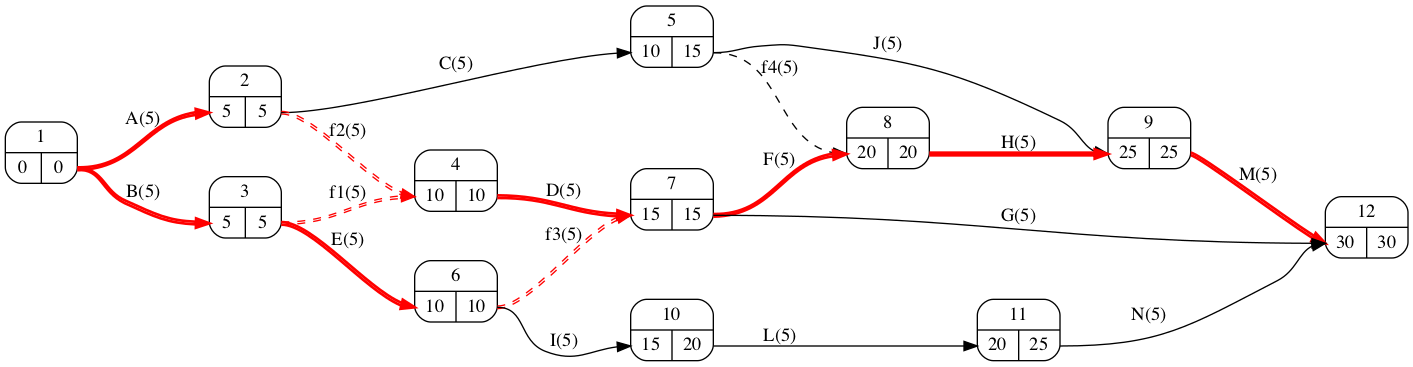

In [91]:
filename='pert_resuelto.png'
proyecto.pert(filename=filename,
              duraciones=datos_enunciado['duracion_planificada'],
              orientation='portrait', tiempos=True, ranksep=1, nodesep=0.5)

### Diagrama de Gantt
Con el nombre de la actividad en la casilla

In [92]:
proyecto.gantt(duraciones=datos_enunciado['duracion_planificada'],
               representar={key: key for key in datos_enunciado.index} )

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
A,A,A,A,A,A,,,,,,,,,,,,,,,,,,,,,,,,,
B,B,B,B,B,B,,,,,,,,,,,,,,,,,,,,,,,,,
C,,,,,,C,C,C,C,C,,,,,,,,,,,,,,,,,,,,
D,,,,,,,,,,,D,D,D,D,D,,,,,,,,,,,,,,,
E,,,,,,E,E,E,E,E,,,,,,,,,,,,,,,,,,,,
F,,,,,,,,,,,,,,,,F,F,F,F,F,,,,,,,,,,
G,,,,,,,,,,,,,,,,G,G,G,G,G,,,,,,,,,,
H,,,,,,,,,,,,,,,,,,,,,H,H,H,H,H,,,,,
I,,,,,,,,,,,I,I,I,I,I,,,,,,,,,,,,,,,
J,,,,,,,,,,,J,J,J,J,J,,,,,,,,,,,,,,,


Con las casillas en blanco

In [93]:
proyecto.gantt(duraciones=datos_enunciado['duracion_planificada'])

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
A,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
B,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
C,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
D,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
E,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
F,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
G,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
H,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
I,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
J,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


### Uso de recursos a lo largo del tiempo

In [94]:
gantt_recursos = proyecto.gantt(duraciones=datos_enunciado['duracion_planificada'],
                                representar=datos_enunciado['recursos'], total='fila')
gantt_recursos

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
A,7,7,7,7,7,,,,,,,,,,,,,,,,,,,,,,,,,
B,7,7,7,7,7,,,,,,,,,,,,,,,,,,,,,,,,,
C,,,,,,7,7,7,7,7,,,,,,,,,,,,,,,,,,,,
D,,,,,,,,,,,7,7,7,7,7,,,,,,,,,,,,,,,
E,,,,,,7,7,7,7,7,,,,,,,,,,,,,,,,,,,,
F,,,,,,,,,,,,,,,,7,7,7,7,7,,,,,,,,,,
G,,,,,,,,,,,,,,,,7,7,7,7,7,,,,,,,,,,
H,,,,,,,,,,,,,,,,,,,,,7,7,7,7,7,,,,,
I,,,,,,,,,,,7,7,7,7,7,,,,,,,,,,,,,,,
J,,,,,,,,,,,7,7,7,7,7,,,,,,,,,,,,,,,


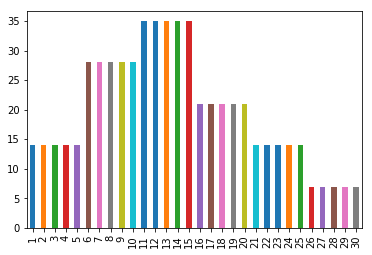

In [44]:
gantt_recursos.data.loc['Total'].plot(kind='bar');

# Método del valor ganado

In [95]:
proyecto.gantt(datos_enunciado['duracion_planificada'])

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
A,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
B,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
C,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
D,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
E,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
F,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
G,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
H,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
I,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
J,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [96]:
proyecto.gantt(datos_enunciado['duracion_real'])

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48
A,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
B,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
C,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
D,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
E,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
F,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
G,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
H,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
I,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
J,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [97]:
vg = ValorGanado(proyecto)

In [103]:
gantts = vg.calcula_gantts(duraciones_planificadas   = datos_enunciado['duracion_planificada'],
                           duraciones_reales         = datos_enunciado['duracion_real'],
                           costes_planificados       = datos_enunciado['coste_planificado'],
                           costes_reales             = datos_enunciado['coste_real'],
                           porcentaje_de_completacion= datos_enunciado['realizado'])


In [104]:
gantts['Gantt_PV']

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,Total
A,1.8,1.8,1.8,1.8,1.8,,,,,,,,,,,,,,,,,,,,,,,,,,9
B,1.8,1.8,1.8,1.8,1.8,,,,,,,,,,,,,,,,,,,,,,,,,,9
C,,,,,,1.8,1.8,1.8,1.8,1.8,,,,,,,,,,,,,,,,,,,,,9
D,,,,,,,,,,,1.8,1.8,1.8,1.8,1.8,,,,,,,,,,,,,,,,9
E,,,,,,1.8,1.8,1.8,1.8,1.8,,,,,,,,,,,,,,,,,,,,,9
F,,,,,,,,,,,,,,,,1.8,1.8,1.8,1.8,1.8,,,,,,,,,,,9
G,,,,,,,,,,,,,,,,1.8,1.8,1.8,1.8,1.8,,,,,,,,,,,9
H,,,,,,,,,,,,,,,,,,,,,1.8,1.8,1.8,1.8,1.8,,,,,,9
I,,,,,,,,,,,1.8,1.8,1.8,1.8,1.8,,,,,,,,,,,,,,,,9
J,,,,,,,,,,,1.8,1.8,1.8,1.8,1.8,,,,,,,,,,,,,,,,9


In [105]:
gantts['Gantt_AC']

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,Total
A,1.25,1.25,1.25,1.25,1.25,1.25,1.25,1.25,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,10
B,1.25,1.25,1.25,1.25,1.25,1.25,1.25,1.25,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,10
C,,,,,,,,,1.25,1.25,1.25,1.25,1.25,1.25,1.25,1.25,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,10
D,,,,,,,,,,,,,,,,,1.25,1.25,1.25,1.25,1.25,1.25,1.25,1.25,,,,,,,,,,,,,,,,,,,,,,,,,10
E,,,,,,,,,1.25,1.25,1.25,1.25,1.25,1.25,1.25,1.25,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,10
F,,,,,,,,,,,,,,,,,,,,,,,,,1.25,1.25,1.25,1.25,1.25,1.25,1.25,1.25,,,,,,,,,,,,,,,,,10
G,,,,,,,,,,,,,,,,,,,,,,,,,1.25,1.25,1.25,1.25,1.25,1.25,1.25,1.25,,,,,,,,,,,,,,,,,10
H,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,1.25,1.25,1.25,1.25,1.25,1.25,1.25,1.25,,,,,,,,,10
I,,,,,,,,,,,,,,,,,1.25,1.25,1.25,1.25,1.25,1.25,1.25,1.25,,,,,,,,,,,,,,,,,,,,,,,,,10
J,,,,,,,,,,,,,,,,,1.25,1.25,1.25,1.25,1.25,1.25,1.25,1.25,,,,,,,,,,,,,,,,,,,,,,,,,10


In [106]:
gantts['Gantt_EV']

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,Total
A,1.125,1.125,1.125,1.125,1.125,1.125,1.125,1.125,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,9
B,1.125,1.125,1.125,1.125,1.125,1.125,1.125,1.125,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,9
C,,,,,,,,,1.125,1.125,1.125,1.125,1.125,1.125,1.125,1.125,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,9
D,,,,,,,,,,,,,,,,,1.125,1.125,1.125,1.125,1.125,1.125,1.125,1.125,,,,,,,,,,,,,,,,,,,,,,,,,9
E,,,,,,,,,1.125,1.125,1.125,1.125,1.125,1.125,1.125,1.125,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,9
F,,,,,,,,,,,,,,,,,,,,,,,,,1.125,1.125,1.125,1.125,1.125,1.125,1.125,1.125,,,,,,,,,,,,,,,,,9
G,,,,,,,,,,,,,,,,,,,,,,,,,1.125,1.125,1.125,1.125,1.125,1.125,1.125,1.125,,,,,,,,,,,,,,,,,9
H,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,1.125,1.125,1.125,1.125,1.125,1.125,1.125,1.125,,,,,,,,,9
I,,,,,,,,,,,,,,,,,1.125,1.125,1.125,1.125,1.125,1.125,1.125,1.125,,,,,,,,,,,,,,,,,,,,,,,,,9
J,,,,,,,,,,,,,,,,,1.125,1.125,1.125,1.125,1.125,1.125,1.125,1.125,,,,,,,,,,,,,,,,,,,,,,,,,9


In [107]:
acumulados = gantts['acumulados']
acumulados

,PV,EV,AC
1,3.6,2.25,2.5
2,7.2,4.5,5
3,10.8,6.75,7.5
4,14.4,9,10
5,18,11.25,12.5
6,25.2,13.5,15
7,32.4,15.75,17.5
8,39.6,18,20
9,46.8,22.5,25
10,54,27,30


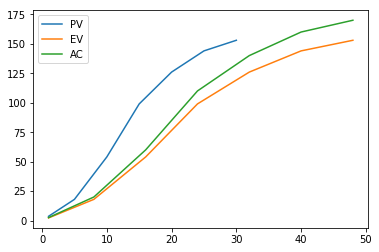

In [108]:
acumulados.plot();